In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
upload= files.upload()

MessageError: ignored

In [0]:
weather_df= pd.read_csv('Weather_data.csv')

In [0]:
weather_df['Datetime'] = pd.to_datetime(weather_df['datetime_utc'] , format = '%Y%m%d-%H:%M')

weather_df.drop(['datetime_utc'], axis=1, inplace= True)
weather_df.index = weather_df.Datetime

In [0]:
weather_df.drop(['Datetime'], axis=1, inplace=True)
weather_df= weather_df.resample('D').mean()

In [0]:
weather_df.tail(10)

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
Datetime,,,,,,,,,,,,,,,,,
2016-11-21,13.000000,0.153846,0.0,28.900000,60.461538,NaN,1013.000000,0.0,0.0,21.538462,0.0,0.0,1.761538,192.857143,NaN,NaN,2.715385
2016-11-22,11.578947,0.000000,0.0,28.733333,50.157895,NaN,1012.894737,0.0,0.0,22.578947,0.0,0.0,2.500000,240.000000,NaN,NaN,8.000000
2016-11-23,12.260870,0.000000,0.0,27.440000,51.434783,NaN,1013.173913,0.0,0.0,22.826087,0.0,0.0,2.608696,248.000000,NaN,NaN,6.604348
2016-11-24,10.421053,0.000000,0.0,NaN,51.473684,NaN,1014.947368,0.0,0.0,21.421053,0.0,0.0,1.652632,263.333333,NaN,NaN,8.289474
2016-11-25,6.450000,0.000000,0.0,NaN,30.550000,NaN,1012.950000,0.0,0.0,23.600000,0.0,0.0,2.500000,285.500000,30.525,NaN,15.085000
2016-11-26,8.235294,0.000000,0.0,NaN,32.647059,NaN,1013.250000,0.0,0.0,24.294118,0.0,0.0,2.764706,288.823529,NaN,NaN,14.494118
2016-11-27,7.409091,0.000000,0.0,NaN,33.636364,NaN,1013.590909,0.0,0.0,23.636364,0.0,0.0,3.545455,274.545455,NaN,NaN,12.459091
2016-11-28,7.000000,0.000000,0.0,NaN,37.318182,NaN,12.045455,0.0,0.0,22.454545,0.0,0.0,2.547619,248.888889,NaN,NaN,9.185714
2016-11-29,11.555556,0.000000,0.0,27.033333,53.722222,NaN,1015.000000,0.0,0.0,21.611111,0.0,0.0,2.166667,91.818182,NaN,NaN,1.238889


In [0]:
weather_df.shape

(7335, 17)

In [0]:
weather_df.isna().sum()

 _dewptm         144
 _fog            141
 _hail           141
 _heatindexm    5507
 _hum            144
 _precipm       7335
 _pressurem      141
 _rain           141
 _snow           141
 _tempm          144
 _thunder        141
 _tornado        141
 _vism           144
 _wdird          250
 _wgustm        6985
 _windchillm    7160
 _wspdm          144
dtype: int64

In [0]:
weather_df.drop([' _windchillm', ' _wgustm', ' _precipm',' _heatindexm'], axis=1, inplace=True)

In [0]:
weather_df.describe()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
count,7191.000000,7194.000000,7194.000000,7191.000000,7.194000e+03,7194.000000,7194.000000,7191.000000,7194.000000,7194.000000,7191.000000,7085.000000,7191.000000
mean,16.118589,0.070402,0.000226,58.311589,2.029026e+03,0.031115,0.000017,25.160038,0.010515,0.000024,2.143728,187.932464,6.873316
std,6.799864,0.168895,0.005415,18.153630,9.165551e+04,0.097157,0.001474,7.446187,0.045445,0.001587,1.914831,85.879390,4.837939
min,-2.909091,0.000000,0.000000,10.500000,-9.999000e+03,0.000000,0.000000,6.000000,0.000000,0.000000,0.121250,0.000000,0.000000
25%,10.571429,0.000000,0.000000,46.708333,9.998750e+02,0.000000,0.000000,18.714286,0.000000,0.000000,1.578636,111.666667,3.475000
50%,15.533333,0.000000,0.000000,59.608696,1.006625e+03,0.000000,0.000000,27.250000,0.000000,0.000000,2.000000,181.428571,6.217391
75%,22.585145,0.000000,0.000000,70.875000,1.014045e+03,0.000000,0.000000,31.125000,0.000000,0.000000,2.625000,272.500000,9.359213
max,29.866667,1.000000,0.166667,100.000000,7.774881e+06,1.000000,0.125000,41.210526,1.000000,0.125000,146.751111,345.000000,113.247368


In [0]:
weather_df[' _wdird'].fillna(weather_df[' _wdird'].mean(), inplace= True)

In [0]:
weather_df.dropna(inplace= True)

In [0]:
weather_df.isnull().sum()

 _dewptm       0
 _fog          0
 _hail         0
 _hum          0
 _pressurem    0
 _rain         0
 _snow         0
 _tempm        0
 _thunder      0
 _tornado      0
 _vism         0
 _wdird        0
 _wspdm        0
dtype: int64

In [0]:
weather_df.shape

(7190, 13)

In [0]:
weather_df.nunique()

 _dewptm       2056
 _fog           177
 _hail            5
 _hum          3125
 _pressurem    2447
 _rain          128
 _snow            2
 _tempm        2204
 _thunder        80
 _tornado         3
 _vism         2575
 _wdird        2127
 _wspdm        3258
dtype: int64

In [0]:


weather_df.dtypes

 _dewptm       float64
 _fog          float64
 _hail         float64
 _hum          float64
 _pressurem    float64
 _rain         float64
 _snow         float64
 _tempm        float64
 _thunder      float64
 _tornado      float64
 _vism         float64
 _wdird        float64
 _wspdm        float64
dtype: object

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

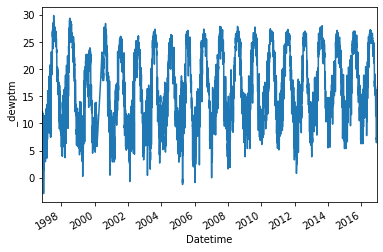

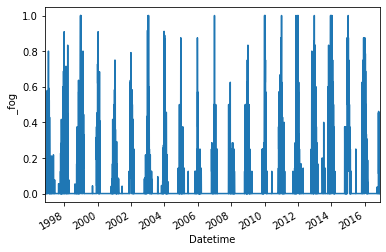

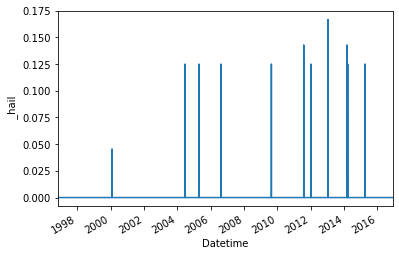

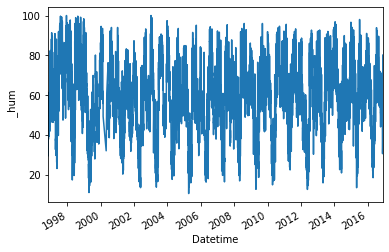

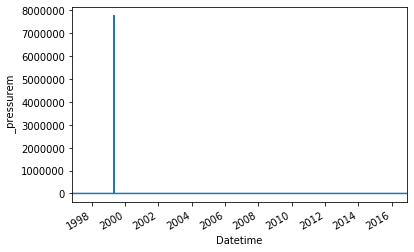

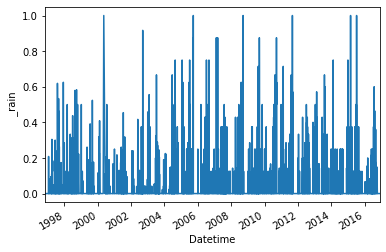

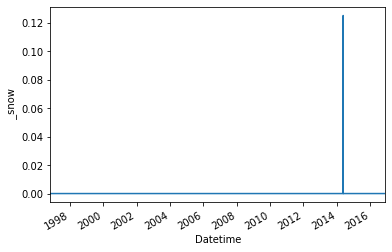

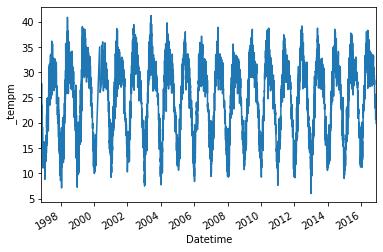

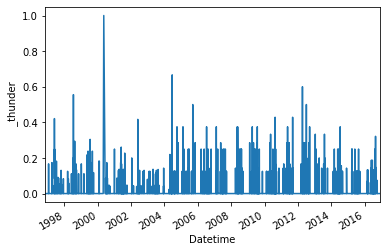

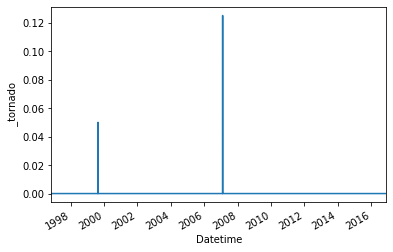

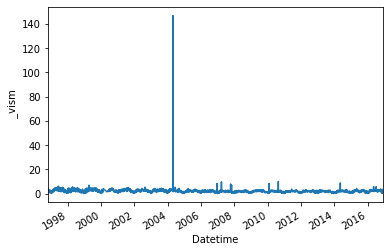

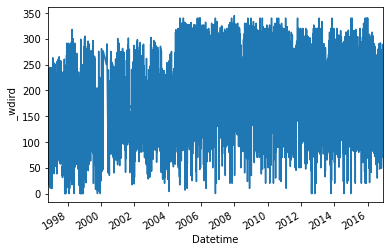

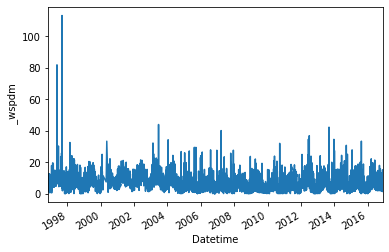

In [0]:
for n in range(0, len(weather_df.columns)):
    weather_df[weather_df.columns[n]].plot()
    plt.ylabel(weather_df.columns[n])
    plt.show()

SARIMAX


In [0]:
arima_df= weather_df[' _tempm']
arima_df

Datetime
1996-11-01    22.333333
1996-11-02    22.916667
1996-11-03    21.791667
1996-11-04    22.722222
1996-11-05    27.800000
                ...    
2016-11-26    24.294118
2016-11-27    23.636364
2016-11-28    22.454545
2016-11-29    21.611111
2016-11-30    19.869565
Name:  _tempm, Length: 7190, dtype: float64

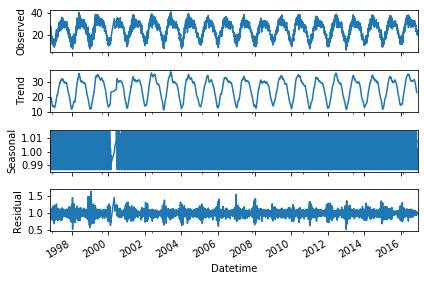

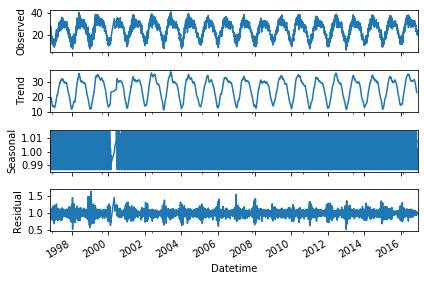

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
res= seasonal_decompose(arima_df, freq= 30, model= 'multiplicative')
res.plot()

In [0]:
!pip install pyramid-arima

In [0]:
from pyramid.arima.stationarity import ADFTest
adf_test= ADFTest(alpha= 0.5)
adf_test.is_stationary(arima_df)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

(0.99, False)

In [0]:
atrain = arima_df[:int(0.8*(len(arima_df)))]
atest = arima_df[int(0.8*(len(arima_df))):]

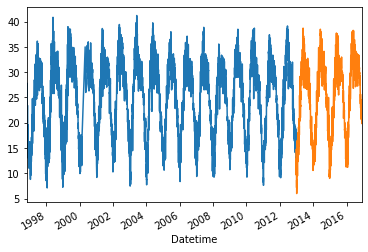

In [0]:
atrain.plot()
atest.plot()

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(arima_df, order=(1,1,1), seasonal_order=(1, 1, 1, 12))
step= model.fit()
step.summary().tables[1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.5835,0.019,30.059,0.000,0.545,0.622
ma.L1,-0.8089,0.015,-54.161,0.000,-0.838,-0.780
ar.S.L12,0.0139,0.011,1.298,0.194,-0.007,0.035
ma.S.L12,-0.9965,0.002,-432.015,0.000,-1.001,-0.992
sigma2,2.8502,0.029,97.823,0.000,2.793,2.907


In [0]:
pred= step.predict(start='2012-12-24', end= '2016-11-30')
type(pred)

pandas.core.series.Series

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'left top'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


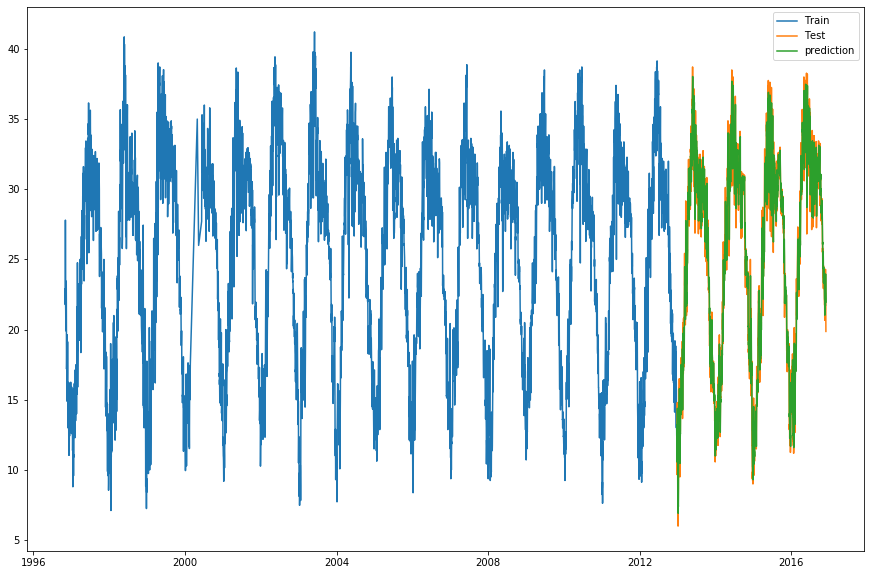

In [0]:
plt.figure(figsize= (15,10))
plt.plot(atrain, label= 'Train')
plt.plot(atest, label='Test')
plt.plot(pred, label= 'prediction')
plt.show()

In [0]:
from sklearn.metrics import r2_score, mean_squared_error

In [0]:
print(r2_score(atest, pred))
print(mean_squared_error(atest, pred))


0.9521389135979836
2.6029456698205244


HWES

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(arima_df)
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
pred = model_fit.predict(start='2012-12-24', end= '2016-11-30')
print(pred)

Datetime
2012-12-24    12.688564
2012-12-25    12.144422
2012-12-26    11.127141
2012-12-27    12.475471
2012-12-28    10.255795
                ...    
2016-11-26    23.200670
2016-11-27    24.064774
2016-11-28    23.726220
2016-11-29    22.721271
2016-11-30    21.843960
Length: 1438, dtype: float64


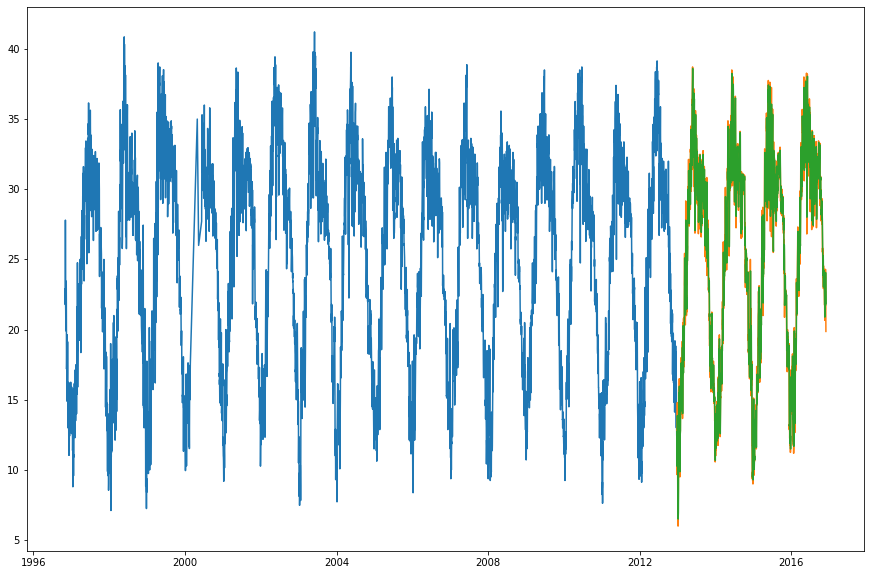

In [0]:
plt.figure(figsize= (15,10))
plt.plot(atrain, label= 'Train')
plt.plot(atest, label='Test')
plt.plot(pred, label= 'prediction')
plt.show()

In [0]:
print(r2_score(atest, pred))
print(mean_squared_error(atest, pred))


0.9503807306723545
2.6985652007809775


VAR

In [0]:
train = weather_df[:int(0.8*(len(weather_df)))]
test = weather_df[int(0.8*(len(weather_df))):]



In [0]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(weather_df)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
df_forecast = pd.DataFrame(prediction, index=test.index, columns=test.columns)
df_forecast

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
Datetime,,,,,,,,,,,,,
2012-12-24,15.812538,0.345131,0.000490,77.882939,627.140206,0.024540,-0.000008,19.921135,0.008195,0.000074,1.489469,131.650148,5.579607
2012-12-25,15.499942,0.281414,0.000464,75.824082,1259.737150,0.031681,0.000002,20.031916,0.008706,0.000058,1.650132,153.269379,6.026462
2012-12-26,15.243615,0.237310,0.000387,73.913491,1512.715478,0.032845,-0.000001,20.175922,0.008290,0.000051,1.738336,165.804933,6.139193
2012-12-27,15.028230,0.206646,0.000329,72.172901,1551.693446,0.032240,-0.000004,20.335548,0.007918,0.000046,1.792233,173.471199,6.143215
2012-12-28,14.845205,0.184992,0.000292,70.610439,1500.966958,0.031232,-0.000006,20.499415,0.007683,0.000043,1.826133,178.439510,6.121677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-26,16.120550,0.070621,0.000226,58.338760,2029.681097,0.031145,0.000017,25.152979,0.010518,0.000024,2.142953,188.075697,6.872738
2016-11-27,16.120550,0.070621,0.000226,58.338760,2029.681097,0.031145,0.000017,25.152979,0.010518,0.000024,2.142953,188.075697,6.872738
2016-11-28,16.120550,0.070621,0.000226,58.338760,2029.681097,0.031145,0.000017,25.152979,0.010518,0.000024,2.142953,188.075697,6.872738


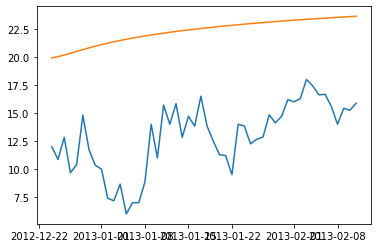

In [0]:
plt.plot(test[' _tempm'].head(50))
plt.plot(df_forecast[' _tempm'].head(50))

In [0]:
print(r2_score(test[' _tempm'], df_forecast[' _tempm']))
print(mean_squared_error(test[' _tempm'], df_forecast[' _tempm']))


0.03905551568831145
52.26137708966936


ml


In [0]:
xtr= train.drop([' _tempm'], axis=1)
ytr=train[' _tempm']
xte= test.drop([' _tempm'], axis=1)
yte=test[' _tempm']

0.966650382376205
1.8137332290135846


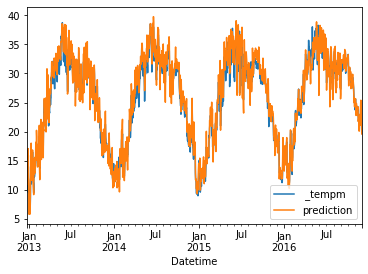

In [0]:
from sklearn.linear_model import LinearRegression
mdl= LinearRegression()
mdl.fit(xtr, ytr)
ypr= mdl.predict(xte)
print(r2_score(yte, ypr))
print(mean_squared_error(yte, ypr))
mlpd= pd.DataFrame(ypr, index= atest.index, columns= ['prediction'])
pd.concat([yte, mlpd], axis=1).plot()
plt.show()

0.9840628088151231
0.8667509641408693


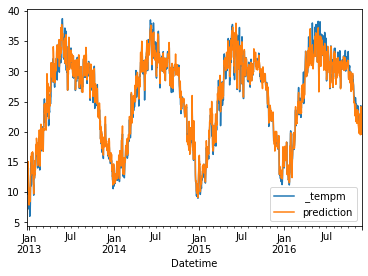

In [0]:
from sklearn.ensemble import RandomForestRegressor
mdl= RandomForestRegressor(n_estimators=100)
mdl.fit(xtr, ytr)
ypr= mdl.predict(xte)
print(r2_score(yte, ypr))
print(mean_squared_error(yte, ypr))
mlpd= pd.DataFrame(ypr, index= atest.index, columns= ['prediction'])
pd.concat([yte, mlpd], axis=1).plot()
plt.show()

0.9853192885062618
0.7984167783308053


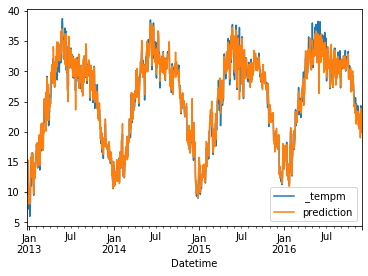

In [0]:
from lightgbm import LGBMRegressor
mdl= LGBMRegressor(n_estimators=1000, learning_rate=0.01)
mdl.fit(xtr, ytr)
ypr= mdl.predict(xte)
print(r2_score(yte, ypr))
print(mean_squared_error(yte, ypr))
mlpd= pd.DataFrame(ypr, index= atest.index, columns= ['prediction'])
pd.concat([yte, mlpd], axis=1).plot()
plt.show()

**conclusion**


In [0]:
#best model-
    #for univariate data- SARIMAX
model= SARIMAX(arima_df, order=(1,1,1), seasonal_order=(1, 1, 1, 12))
step= model.fit()
    #for multivariate data- LGBMRegressor
x= weather_df.drop([' _tempm'], axis=1)
y= weather_df[' _tempm']
mdl= LGBMRegressor(n_estimators=1000, learning_rate=0.01)
mdl.fit(x, y)